<a href="https://colab.research.google.com/github/jacekwachowiak/DL-workshop-series/blob/master/TensorFlow_js_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Prerequisites**

First we need to install TensorFlow.js CLI for converting the model into the format readable by TensorFlow.js. It's necessary to use 1.0.1 for the compatibility with TensorFlow core.

In [0]:
!pip install tensorflowjs==1.0.1

from google.colab import files
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
from keras.applications import imagenet_utils

tf.__version__

In [0]:
def prepare_image(file):
    '''
    Function to make the image into the multi dimentional tensor.
    '''
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

# Upload your own image

This uploaded image is used for fine tuning the pre-trained MobileNet model. Please take a look into [Fine-Tuning](https://www.tensorflow.org/hub/fine_tuning) for more detail.

In [0]:
from google.colab import files
files.upload()

{}

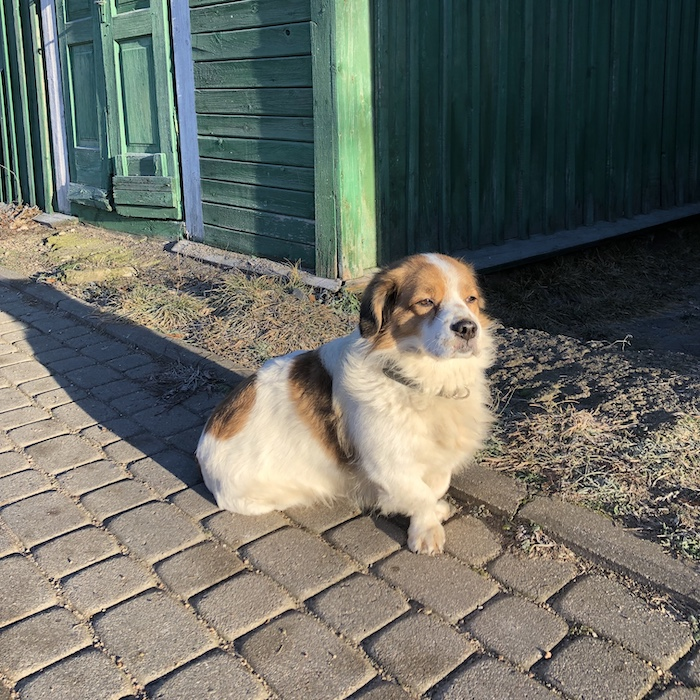

In [0]:
from IPython.display import Image
Image('dog.JPG')

# Load Pretrained MobileNet

In [0]:
# TODO: Rename the image 
X = prepare_image('dog.JPG')
y = np.zeros([1, 1000])
y[0][154] = 1 # Pekingese
model = MobileNet(include_top = True, weights = 'imagenet', input_shape=None)

# Fine tune with the given image
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x=X, y=y)


# Prediction Test
# predictions = model.predict(X)
# results = imagenet_utils.decode_predictions(predictions)
# results

1/1 [==============================] - 2s 2s/sample - loss: 7.0933 - accuracy: 0.0000e+00


# Save and Download the model

After the fine-tuning with the given image, this section serialize the model and makes it into the format readable by TensorFlow.js. The model can be loaded by `loadLayersModel` of TensorFlow.js.


In [0]:
!rm -rf ./mymobilenet* ./model.h5
model.save('./model.h5')

!tensorflowjs_converter --input_format=keras ./model.h5 ./mymobilenet
!zip -r ./mymobilenet.zip ./mymobilenet 
files.download( "./mymobilenet.zip" )

  adding: mymobilenet/ (stored 0%)
  adding: mymobilenet/group1-shard5of5.bin (deflated 7%)
  adding: mymobilenet/group1-shard2of5.bin (deflated 7%)
  adding: mymobilenet/group1-shard4of5.bin (deflated 7%)
  adding: mymobilenet/group1-shard1of5.bin (deflated 7%)
  adding: mymobilenet/model.json (deflated 94%)
  adding: mymobilenet/group1-shard3of5.bin (deflated 7%)
